In [45]:
import numpy as np
import pandas as pd
import seaborn as sea
import re
import sys
import string
import nltk
from collections import Counter
from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine, load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from PIL import Image
from sklearn.utils import shuffle
from time import time
import matplotlib.pyplot as plot
%matplotlib inline

In [3]:
# Task 1
bike_india = pd.read_csv("/home/Stoliarchuk/bike_dataset.csv")
print(bike_india.columns)
print(bike_india.shape)
bike_india = bike_india.dropna() 
bike_india.isnull().sum()

Index(['model_name', 'price', 'CC', 'mileage', 'type_of_bike', 'weight_in_kg',
       'links', 'acceleration_speed', 'top_speed'],
      dtype='object')
(361, 9)


model_name            0
price                 0
CC                    0
mileage               0
type_of_bike          0
weight_in_kg          0
links                 0
acceleration_speed    0
top_speed             0
dtype: int64

In [6]:
#Task 1
bike_india_only_float  = bike_india.drop(columns=['type_of_bike', 'links'], axis=1).set_index('model_name') 
x = bike_india_only_float.drop(['price'], axis=1)
y = bike_india_only_float['price']
scaler = StandardScaler()
bike_india_ss = scaler.fit_transform(x)
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(bike_india_ss)
print (pca_result)

[[-2.57223017e+00 -1.20928529e+00]
 [-2.43553709e+00 -1.20532151e+00]
 [-2.35665891e+00 -1.03958688e+00]
 [-2.47678451e+00 -9.56818817e-01]
 [-2.18470139e+00 -1.00289041e+00]
 [-2.69744288e+00  1.91123337e-01]
 [-3.15740839e+00  5.18634243e-01]
 [-2.71287214e+00  1.27942879e-01]
 [-1.99183772e+00 -1.04582098e+00]
 [-2.44666113e+00  2.47673672e-01]
 [-2.46063139e+00 -1.40522424e-01]
 [-2.34177445e+00 -1.39017239e-01]
 [-2.41241570e+00  2.16127838e-01]
 [-2.86737841e+00  8.92141169e-01]
 [-2.77336945e+00  7.89505953e-01]
 [-2.25254823e+00  2.63600543e-01]
 [-3.38903631e+00  1.54133145e+00]
 [-4.77830329e+00  3.15903286e+00]
 [-1.31075143e+00 -8.73862568e-01]
 [-2.67336271e+00  6.39861206e-01]
 [-2.64979615e+00  6.20767128e-01]
 [-2.29102152e+00  6.23479680e-02]
 [-3.50997345e+00  1.07883944e+00]
 [-2.25618054e+00 -3.67860033e-02]
 [-1.40591385e+00 -9.21264391e-01]
 [-1.40198282e+00 -8.20499486e-01]
 [-1.89313448e+00  1.79401464e+00]
 [-1.94563965e+00 -5.14554956e-01]
 [-5.89900041e-01 -6

<AxesSubplot: xlabel='pca_1_column', ylabel='pca_2_column'>

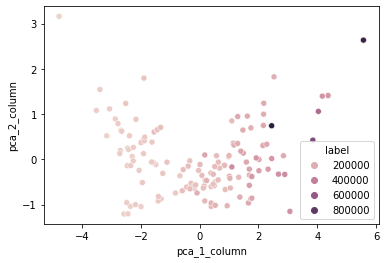

In [8]:
pca_result_one = pd.DataFrame({'pca_1_column': pca_result[:,0], 'pca_2_column': pca_result[:,1], 'label': y})
sea.scatterplot(x='pca_1_column', y='pca_2_column', hue='label', data=pca_result_one)

In [9]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(bike_india_only_float)
print (tsne_result)

[[ 1.20792589e+01 -2.23381662e+00]
 [ 1.14862118e+01 -2.44827676e+00]
 [ 1.23178463e+01 -2.38654995e+00]
 [ 1.07097397e+01 -2.15587544e+00]
 [ 9.69565678e+00 -2.26383328e+00]
 [ 9.47871017e+00 -1.67423439e+00]
 [ 1.19119282e+01 -2.12160659e+00]
 [ 9.68155193e+00 -2.26489449e+00]
 [ 1.15286093e+01 -2.45853233e+00]
 [ 9.67720222e+00 -2.26520634e+00]
 [ 9.88538265e+00 -1.80605447e+00]
 [ 8.77685738e+00 -2.20588589e+00]
 [ 1.14238806e+01 -2.12797022e+00]
 [ 1.18338499e+01 -2.52019501e+00]
 [ 9.02617645e+00 -2.21432829e+00]
 [ 1.06883316e+01 -2.14981699e+00]
 [ 1.03778744e+01 -2.21703744e+00]
 [ 1.23110275e+01 -2.38635921e+00]
 [ 6.29155064e+00 -1.46157658e+00]
 [ 9.00154400e+00 -1.60552013e+00]
 [ 8.31802368e+00 -1.46909881e+00]
 [ 1.18158741e+01 -2.52192283e+00]
 [ 1.15848217e+01 -2.08721089e+00]
 [ 9.76319695e+00 -1.74121058e+00]
 [ 8.33775806e+00 -2.11646104e+00]
 [ 7.31528807e+00 -1.63145471e+00]
 [ 4.09152222e+00 -1.08876336e+00]
 [ 8.38437080e+00 -2.12671256e+00]
 [ 5.95459044e-01 -6

<AxesSubplot: xlabel='tsne_1', ylabel='tsne_2'>

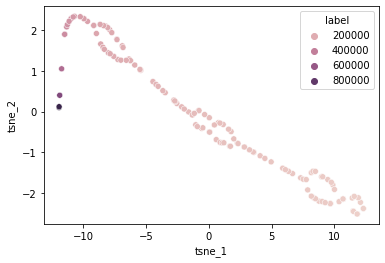

In [11]:
tsne_result_one = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
sea.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_one)

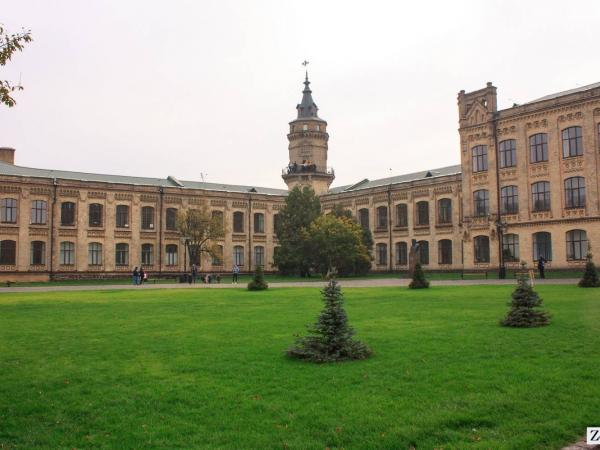

In [35]:
# Task 2
n_colors = [64, 32, 16, 8]
image = Image.open("/home/Stoliarchuk/kpi.jpg")
image

In [36]:
image = np.array(image, dtype=np.float64) / 255 #Image in array
w, h, d = original_shape = tuple(image.shape)
image_array = np.reshape(image, (w * h, d))
assert d == 3
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
image

array([[[0.96078431, 0.93333333, 0.96470588],
        [0.96078431, 0.93333333, 0.96470588],
        [0.96078431, 0.93333333, 0.96470588],
        ...,
        [0.98823529, 0.98823529, 0.98823529],
        [0.98823529, 0.98823529, 0.98823529],
        [0.98823529, 0.98823529, 0.98823529]],

       [[0.96078431, 0.93333333, 0.96470588],
        [0.96078431, 0.93333333, 0.96470588],
        [0.96078431, 0.93333333, 0.96470588],
        ...,
        [0.98823529, 0.98823529, 0.98823529],
        [0.98823529, 0.98823529, 0.98823529],
        [0.98823529, 0.98823529, 0.98823529]],

       [[0.96078431, 0.93333333, 0.96470588],
        [0.96078431, 0.93333333, 0.96470588],
        [0.96078431, 0.93333333, 0.96470588],
        ...,
        [0.98823529, 0.98823529, 0.98823529],
        [0.98823529, 0.98823529, 0.98823529],
        [0.98823529, 0.98823529, 0.98823529]],

       ...,

       [[0.16078431, 0.22352941, 0.04705882],
        [0.14117647, 0.20392157, 0.02745098],
        [0.31764706, 0

/home/kali/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


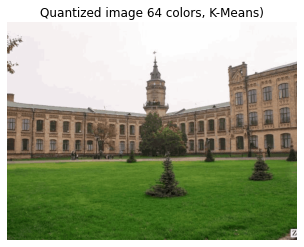

In [40]:
# kmeans = 64
kmeans_64 = KMeans(n_clusters=64, random_state=0).fit(image_array_sample)
labels_64 = kmeans_64.predict(image_array)
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)
plot.clf()
plot.axis("off")
plot.title("Quantized image 64 colors, K-Means)")
plot.imshow(recreate_image(kmeans_64.cluster_centers_, labels_64, w, h))

/home/kali/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


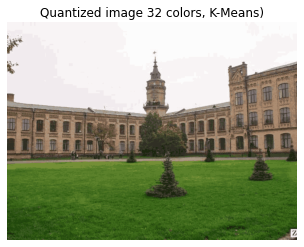

In [41]:
# kmeans = 32
kmeans_32 = KMeans(n_clusters=32, random_state=0).fit(image_array_sample)
labels_32 = kmeans_32.predict(image_array)
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)
plot.clf()
plot.axis("off")
plot.title("Quantized image 32 colors, K-Means)")
plot.imshow(recreate_image(kmeans_32.cluster_centers_, labels_32, w, h))

/home/kali/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


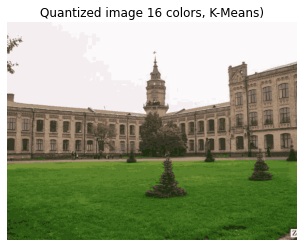

In [42]:
# kmeans = 16
kmeans_16 = KMeans(n_clusters=16, random_state=0).fit(image_array_sample)
labels_16 = kmeans_16.predict(image_array)
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)
plot.clf()
plot.axis("off")
plot.title("Quantized image 16 colors, K-Means)")
plot.imshow(recreate_image(kmeans_16.cluster_centers_, labels_16, w, h))

/home/kali/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


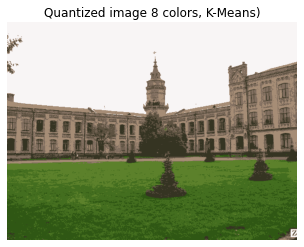

In [43]:
# kmeans = 8
kmeans_8 = KMeans(n_clusters=8, random_state=0).fit(image_array_sample)
labels_8 = kmeans_8.predict(image_array)
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)
plot.clf()
plot.axis("off")
plot.title("Quantized image 8 colors, K-Means)")
plot.imshow(recreate_image(kmeans_8.cluster_centers_, labels_8, w, h))

In [44]:
# Task 3
text_data = pd.read_csv("/home/Stoliarchuk/tripadvisor_hotel_reviews.csv")
text_data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [7]:
Counter( text_data['Rating'])

Counter({4: 6039, 2: 1793, 3: 2184, 5: 9054, 1: 1421})

In [47]:
stop_words = stopwords.words('english')
filtered_text = []
for i in text_data["Review"]:
    i = re.sub("\d", " ", i)
    i = re.sub('\n', ' ', i)
    i = re.sub("#\S+", " ", i)
    i = re.sub("\d", " ", i)    
    i = re.sub('\s{2,}', " ", i)
    i = re.sub("@\S+", " ", i)
    i = re.sub("https*\S+", " ", i)
    i = re.sub('[%s]' % re.escape(string.punctuation), ' ', i)
    i = re.sub("https*\S+", " ", i)
    text_tokens = word_tokenize(i)
    for k in text_tokens:
        if k not in stop_words:
            filtered_text.append(k)

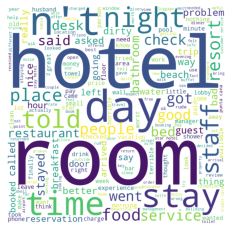

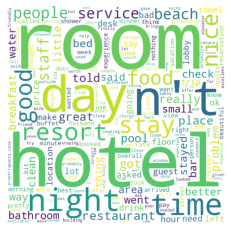

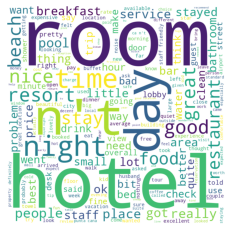

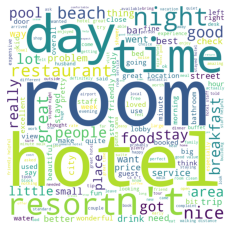

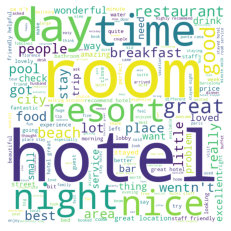

In [48]:
def visualize(label):
    text = ''
    for msg in text_data[text_data['Rating'] == label]['Review']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=800, height=800, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
for i in range(1, 6):
    visualize(i)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(text_data['Review'], text_data['Rating'], test_size=0.20)
tfidf_vectorizer = TfidfVectorizer(max_df=500, min_df=10)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test =  tfidf_vectorizer.transform(x_test)
classification = LogisticRegression().fit(tfidf_train, y_train)
prediction = classification.predict(tfidf_test)
print(accuracy_score(y_test,prediction))
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

0.5489143693583801
              precision    recall  f1-score   support

           1       0.69      0.48      0.56       288
           2       0.45      0.28      0.34       334
           3       0.27      0.09      0.14       398
           4       0.42      0.41      0.41      1221
           5       0.63      0.80      0.70      1858

    accuracy                           0.55      4099
   macro avg       0.49      0.41      0.43      4099
weighted avg       0.52      0.55      0.52      4099

[[ 137   60   17   31   43]
 [  44   92   36  103   59]
 [   9   39   37  198  115]
 [   6   11   36  500  668]
 [   2    4   11  357 1484]]


/home/kali/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
